In [264]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [265]:
# help(nd.random)
ndX = nd.random.normal(scale=1, shape=(1000, 2))
fTrueW = nd.array([2, -3.4])
fTrueB = 4.2
ndTrueY = nd.dot(ndX, nd.transpose(fTrueW)) + fTrueB
ndTrueY += nd.random.normal(scale=0.01, shape=ndTrueY.shape)
# print(ndTrueY)
print(ndTrueY.shape)
# print(data_x)

(1000L,)


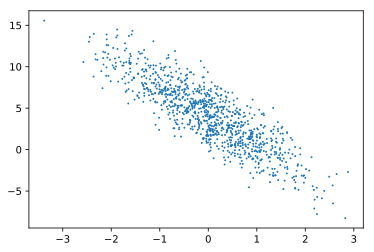

In [266]:
# help(display.display(ndY))
display.set_matplotlib_formats("svg")
plt.scatter(ndX[:, 1].asnumpy(), ndTrueY.asnumpy(),1)

In [267]:
def get_batch(ndX, ndY, iBatchSize=10):
    """Get batch size data
    """
    iNum = ndX.shape[0]
    lIndice = list(range(iNum))
    random.shuffle(lIndice)
    for iIndex in xrange(0, iNum, iBatchSize):
        ndJ = nd.array(lIndice[iIndex: min(iIndex+iBatchSize, iNum)])
        yield ndX.take(ndJ), ndY.take(ndJ)       

In [268]:
def loss(ndTrueY, ndPredY):
    """Compute loss
    """
    return nd.sum((ndTrueY - ndPredY).square())/2

In [269]:
# ndTrueY = nd.random.normal(0, 1, shape=(10))
# ndPredY = nd.random.normal(0, 1, shape=(10))
# print(loss(ndTrueY, ndPredY))

In [270]:
def forward(ndX, ndW, ndB):
    return nd.dot(ndX, ndW) + ndB

In [277]:
def sgd(ndParam, fLR=0.1, iBatchSize=10):
#     print(ndParam)
#     print("grad:{}".format(ndParam.grad))
#     print(ndParam)
#     print(ndParam.grad)
    for param in ndParam:
        param[:] = param - param.grad * fLR / iBatchSize
#     print(ndParam)
#     input()

In [278]:
ndPredW = nd.random.normal(0, 10, shape=[2])
ndPredB = nd.random.normal(0, 10, shape=[1])
ndPredW.attach_grad()
ndPredB.attach_grad()

In [281]:
def run_model(ndX, ndY):
    ndPredW = nd.random.normal(0, 10, shape=[2])
    ndPredB = nd.random.normal(0, 10, shape=[1])
#     print(ndPredW)
#     print(ndPredB)
    ndPredW.attach_grad()
    ndPredB.attach_grad()
    for iEpoch in range(8):
        for ndBatchX, ndBatchY in get_batch(ndX, ndY):
            with autograd.record():
                ndPredY = forward(ndBatchX, ndPredW, ndPredB)
                l = loss(ndBatchY, ndPredY)
                l.backward()
            sgd([ndPredW, ndPredB], 0.01, 10)

        print("loss:{}\n".format(l))
    print("ndPredW:{}".format(ndPredW))
    print("ndPredB:{}".format(ndPredB))

In [282]:
run_model(ndX, ndTrueY)

loss:
[300.27884]
<NDArray 1 @cpu(0)>

loss:
[31.890757]
<NDArray 1 @cpu(0)>

loss:
[5.2431145]
<NDArray 1 @cpu(0)>

loss:
[1.0597862]
<NDArray 1 @cpu(0)>

loss:
[0.14668842]
<NDArray 1 @cpu(0)>

loss:
[0.03157467]
<NDArray 1 @cpu(0)>

loss:
[0.00487754]
<NDArray 1 @cpu(0)>

loss:
[0.00161559]
<NDArray 1 @cpu(0)>

ndPredW:
[ 2.0116436 -3.3975484]
<NDArray 2 @cpu(0)>
ndPredB:
[4.1973624]
<NDArray 1 @cpu(0)>
